In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [2]:
def normalise_row(row):
    normalise_dict = {1 : 12, 2 : 6, 3 : 3, 4 : 3, 5 : 4 , 6 : 4}
    #print(row)
    #print(row['essay_set'])
    return row['domain1_score'] / normalise_dict[row['essay_set']]

In [3]:
# read the data file
essays = pd.read_csv("essays.csv", encoding = 'latin1')
print(essays)

      Unnamed: 0  essay_id  essay_set  \
0              1         1          1   
1              2         2          1   
2              3         3          1   
3              4         4          1   
4              5         5          1   
5              6         6          1   
6              7         7          1   
7              8         8          1   
8              9         9          1   
9             10        10          1   
10            11        11          1   
11            12        12          1   
12            13        13          1   
13            14        14          1   
14            15        15          1   
15            16        16          1   
16            17        17          1   
17            18        18          1   
18            19        19          1   
19            20        20          1   
20            21        21          1   
21            22        22          1   
22            23        23          1   
23            24

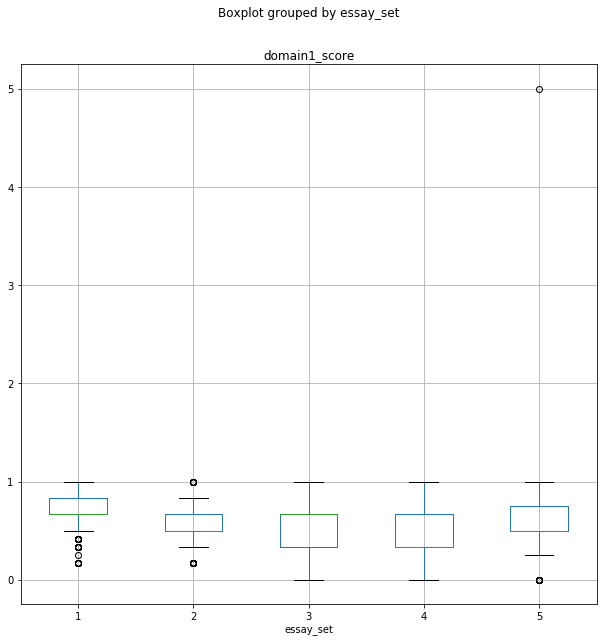

In [4]:
# see domain1_score distribution

%matplotlib inline 
essays.boxplot(column = 'domain1_score', by = 'essay_set', figsize = (10,10))


In [5]:
#  important for prediction

essay_data = essays[['essay_set', 'essay', 'domain1_score']].copy()
essay = essays['essay']
essay_score = essays['domain1_score']

In [6]:
# using bag of words
vectorizer = CountVectorizer(stop_words='english')
count_vectors = vectorizer.fit_transform(essay_data[(essay_data['essay_set'] == 1) | (essay_data['essay_set'] == 2)]['essay'])
feature_names = vectorizer.get_feature_names()

X = count_vectors.toarray()
y = essay_data[(essay_data['essay_set'] == 1) | (essay_data['essay_set'] == 2)]['domain1_score'].as_matrix()

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30)


C:\Users\swath\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [7]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
# first lets try linear Regression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

#print(y_pred)

print('Coefficients: \n', linear_regressor.coef_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print([i for i in X_test[0] if i!=0])

print("Please enter the test case as per format in essays.csv (sample displayed above): ")
xtest= input()

ypred = linear_regressor.predict([X_test[0]])   #change to xtest[i] where i is the index of test case

print("Predicted - linear regression")
for i in list(ypred):
    print(i)
    print(np.ceil(i))

Coefficients: 
 [ 0.00052069  0.00407278 -0.0087031  ...  0.00822422  0.00401609
  0.00328218]
Mean squared error: 10.89
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 5, 3, 1, 2, 1, 1, 2, 12, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 4, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 5, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 3, 1, 2, 2, 3, 2, 1, 2, 9, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1]
Please enter the test case as per format in essays.csv (sample displayed above): 
0
Predicted - linear regression
0.6118414098932918
1.0


In [9]:
# lets try a lasso regression model

alphas = np.array([3, 1, 0.3, 0.1])

lasso_regressor = Lasso()

grid = GridSearchCV(estimator = lasso_regressor, param_grid = dict(alpha=alphas))
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

#print('Coefficients: \n', lasso_regressor.coef_)

print("Please enter the test case as per format in essays.csv (sample displayed above): ")
xtest= input()

ypred = grid.predict([X_test[0]])   #change to xtest[i] where i is the index of test case

print("Predicted - lasso regression")
for i in list(ypred):
    print(i)
    print(np.ceil(i))

C:\Users\swath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\swath\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean squared error: 0.02
Please enter the test case as per format in essays.csv (sample displayed above): 
0
Predicted - lasso regression
0.625508736793184
1.0


In [10]:
# lets also try SVMs
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

y_pred = svr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

print("Please enter the test case as per format in essays.csv (sample displayed above): ")
xtest= input()

ypred = svr.predict([X_test[0]])   #change to xtest[i] where i is the index of test case

print("SVM -rbf kernel")
for i in list(ypred):
    print(i)
    print(np.ceil(i))

C:\Users\swath\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Mean squared error: 0.01
Please enter the test case as per format in essays.csv (sample displayed above): 
0
SVM -rbf kernel
0.6800067920017965
1.0


In [11]:
# see which svm model is the best

options = ['linear','rbf','poly','sigmoid']
mse = []

for option in options:
    svr = SVR(kernel=option)
    svr.fit(X_train,y_train)
    
    y_pred = svr.predict(X_test)
    
    mse.append(mean_squared_error(y_test,y_pred))
    
print(mse)

C:\Users\swath\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\swath\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\swath\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[6.056190281453591, 0.008595754171798047, 31.44943886395372, 27.603264812111846]


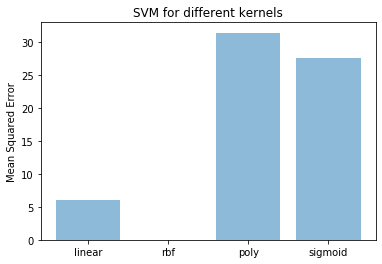

In [12]:
 
objects = ('linear','rbf','poly','sigmoid')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, mse, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Squared Error')
plt.title('SVM for different kernels')
 
plt.show()

In [13]:
# lets try with tfidf

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(essay_data[(essay_data['essay_set'] == 1) | (essay_data['essay_set'] == 2)]['essay'])
y = essay_data[(essay_data['essay_set'] == 1) | (essay_data['essay_set'] == 2)]['domain1_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
print(X_train.shape)

(2120, 23564)


In [18]:
# first lets try linear Regression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

print('Coefficients: \n', linear_regressor.coef_)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

ypred = linear_regressor.predict(X_test[0].reshape(1,-1))   #change to xtest[i] where i is the index of test case

print("Predicted - linear regression")
for i in list(ypred):
    print(i)
    print(np.ceil(i))

Coefficients: 
 [ 0.01676959  0.02461724 -0.07299951 ... -0.0011345   0.02618563
  0.01734031]
Mean squared error: 0.01
Predicted - linear regression
0.7444998061143508
1.0


In [19]:
# lets try a lasso regression model

alphas = np.array([3, 1, 0.3, 0.1])

lasso_regressor = Lasso()

grid = GridSearchCV(estimator = lasso_regressor, param_grid = dict(alpha=alphas))
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

#print('Coefficients: \n', lasso_regressor.coef_)

ypred = grid.predict(X_test[0].reshape(1,-1))   #change to xtest[i] where i is the index of test case

print("Predicted - lasso regression")
for i in list(ypred):
    print(i)
    print(np.ceil(i))

C:\Users\swath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Mean squared error: 0.02
Predicted - lasso regression
0.6237028301886793
1.0


In [20]:
# lets also try SVMs
svr = SVR(kernel='linear',C=0.5)
svr.fit(X_train,y_train)

y_pred = svr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

ypred = svr.predict(X_test[0].reshape(1,-1))   #change to xtest[i] where i is the index of test case

print("Predicted - SVM linear kernel")
for i in list(ypred):
    print(i)
    print(np.ceil(i))

Mean squared error: 0.01
Predicted - SVM linear kernel
0.7618266721378641
1.0


In [21]:
# see which svm model is the best

options = ['linear','rbf','poly','sigmoid']
mse = []

for option in options:
    svr = SVR(kernel=option)
    svr.fit(X_train,y_train)
    
    y_pred = svr.predict(X_test)
    
    mse.append(mean_squared_error(y_test,y_pred))
    
print(mse)

C:\Users\swath\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\swath\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\swath\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.010864295983071044, 0.02111069567313262, 0.021470174795234956, 0.02128050471705036]


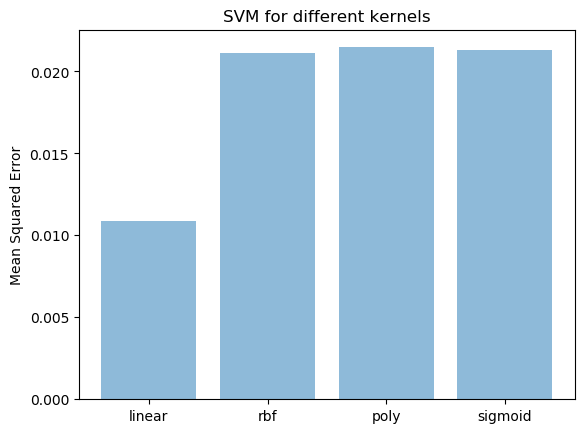

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('linear','rbf','poly','sigmoid')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, mse, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Squared Error')
plt.title('SVM for different kernels')
 
plt.show()